In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

def show(mean, output):
    dims = len(mean)
    plt.plot([0] * dims, "black", ls=('dashed'))
    plt.plot(mean, "o")
    for i in range(len(output)):
        plt.plot(output[i])
    plt.show()
    
output_shape = (10,)

"""
mean = np.array([0,0,0,0])
cov = np.array(
    [
     [1, .7, .5, .3],
     [.7, 1, .7, .5],
     [.5, .7, 1, .7],
     [.3, .5, .7, 1]
     ])
output = multivariate_normal(mean, cov, output_shape)

show(mean, output)
"""

'\nmean = np.array([0,0,0,0])\ncov = np.array(\n    [\n     [1, .7, .5, .3],\n     [.7, 1, .7, .5],\n     [.5, .7, 1, .7],\n     [.3, .5, .7, 1]\n     ])\noutput = multivariate_normal(mean, cov, output_shape)\n\nshow(mean, output)\n'

In [2]:
from copy import deepcopy

def fix_mean_and_output(mean, output, pos, value):
    mean = np.insert(mean, pos, value)
    output = np.insert(output, pos, value, axis = 1)
    return(mean, output)

def fix_multiple(mean, output, pos_value_dict):
    pos_value_dict = deepcopy(pos_value_dict)
    if(len(pos_value_dict) == 1):
        for pos, value in pos_value_dict.items():
            return(fix_mean_and_output(mean, output, pos, value))
    else:
        pos = min(k for k, v in pos_value_dict.items())
        value = pos_value_dict[pos]
        mean, output = fix_mean_and_output(mean, output, pos, value)
        del pos_value_dict[pos]
        return(fix_multiple(mean, output, pos_value_dict))

"""
mean = np.array([0,1,2,3])
cov = np.array(
    [
     [1, .7, .5, .3],
     [.7, 1, .7, .5],
     [.5, .7, 1, .7],
     [.3, .5, .7, 1]
     ])

print("First:")
print(mean)
print(output)

pos = 2
value = -1
mean = np.hstack([mean[:pos], mean[pos+1:]])
output = np.hstack([output[:,:pos], output[:,pos+1:]])

print("\nConstrained:")
print(mean)
print(output)

mean, output = fix_mean_and_output(mean, output, pos, value)

print("\nFixed:")
print(mean)
print(output)
"""

'\nmean = np.array([0,1,2,3])\ncov = np.array(\n    [\n     [1, .7, .5, .3],\n     [.7, 1, .7, .5],\n     [.5, .7, 1, .7],\n     [.3, .5, .7, 1]\n     ])\n\nprint("First:")\nprint(mean)\nprint(output)\n\npos = 2\nvalue = -1\nmean = np.hstack([mean[:pos], mean[pos+1:]])\noutput = np.hstack([output[:,:pos], output[:,pos+1:]])\n\nprint("\nConstrained:")\nprint(mean)\nprint(output)\n\nmean, output = fix_mean_and_output(mean, output, pos, value)\n\nprint("\nFixed:")\nprint(mean)\nprint(output)\n'

Mean:
[0 0].

Covariance:
[[1.  0.7]
 [0.7 1. ]].

Outputs:
[[-1.67457733 -1.47015583]
 [ 0.96856937  1.6936974 ]
 [ 0.55738021  0.22340576]
 [ 1.3362125   0.65956122]
 [-0.30330868  0.29338341]
 [-1.09359906 -1.21786949]
 [ 0.2653959   0.25132914]
 [ 0.62068757 -0.0781618 ]
 [-0.58290463  0.66334115]
 [-0.34558439 -0.35333911]].


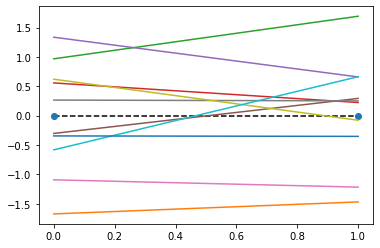


What's the second variable if the first variable is 0.5?

Mean after:
[0.35].

Cov after:
[[0.51]].

Output:
[[ 0.86645497]
 [ 1.01975073]
 [ 1.61537862]
 [-0.1761852 ]
 [ 1.2017147 ]
 [-0.26746878]
 [ 0.90215192]
 [ 0.28850812]
 [-1.29369627]
 [ 0.64358395]].


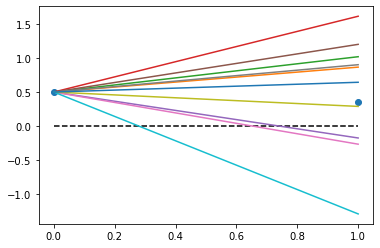

In [3]:
mean = np.array([0,0])
cov = np.array([[1, .7],[.7, 1]])
output = multivariate_normal(mean, cov, output_shape)

print("Mean:\n{}.\n\nCovariance:\n{}.\n\nOutputs:\n{}.".format(mean, cov, output))
show(mean, output)

x_0 = .5
print("\nWhat's the second variable if the first variable is {}?".format(x_0))

mean = np.array([mean[1] + (cov[0,1] / cov[0,0]) * (x_0 - mean[0])])
cov = np.array([[cov[1,1] - (cov[1,0] / cov[0,0]) * cov[0,1]]])
output = multivariate_normal(mean, cov, output_shape)

print("\nMean after:\n{}.\n\nCov after:\n{}.\n\nOutput:\n{}.".format(mean, cov, output))

mean, output = fix_mean_and_output(mean, output, 0, x_0)
show(mean, output)

Now let's work in higher dimensions!
Mean:
[0 0 0 0].

Covariance:
[[1.  0.7 0.5 0.3]
 [0.7 1.  0.7 0.5]
 [0.5 0.7 1.  0.7]
 [0.3 0.5 0.7 1. ]].

Outputs:
[[ 0.42312186 -0.17615342 -0.16625683  0.18716446]
 [-1.58842924 -0.68695185  0.45135377  0.59545047]
 [-0.71543972 -1.02620277 -0.76419588  0.08391138]
 [ 0.97435874  0.44640054 -0.75211266  0.48457791]
 [ 0.392469    0.81735517 -0.38096425 -0.27779905]
 [-0.36197783 -2.14322886 -1.46619651 -0.96161577]
 [-0.42148469 -0.12210194 -0.76274831 -0.51886715]
 [ 0.6936344   0.05110249  0.23756708  0.18762892]
 [ 0.94955603 -0.55003483 -0.65829819 -0.24118861]
 [-0.75880644 -1.82482366 -0.74548765 -0.20152586]].


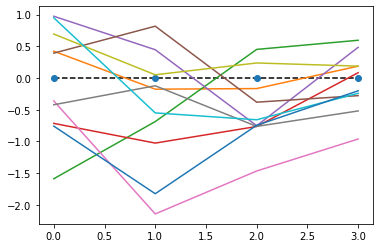


What if variable 3 is 1?

Mean after:
[0.5 0.7 0.7].

Cov after:
[[ 0.75  0.35 -0.05]
 [ 0.35  0.51  0.01]
 [-0.05  0.01  0.51]].

Output:
[[ 0.56730232  1.21904344  0.45435447]
 [ 0.04090826 -0.05813888  0.41535993]
 [-0.04988285 -0.35535447  0.11696052]
 [-0.6959515  -0.35187974  1.52401323]
 [ 0.60950891 -0.06850473  0.36784954]
 [ 0.48722927  0.26698897  0.90039907]
 [ 1.04050267  2.09254698  0.3789222 ]
 [ 0.06611071 -0.73851096  0.12702167]
 [-0.91701991 -0.17626614  0.83632764]
 [ 0.67729774  0.87830905  0.76749907]].


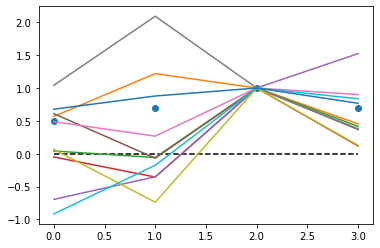

In [4]:
print("Now let's work in higher dimensions!")

mean = np.array([0,0,0,0])
cov = np.array(
    [
     [1, .7, .5, .3],
     [.7, 1, .7, .5],
     [.5, .7, 1, .7],
     [.3, .5, .7, 1]
     ])
output = multivariate_normal(mean, cov, output_shape)
print("Mean:\n{}.\n\nCovariance:\n{}.\n\nOutputs:\n{}.".format(mean, cov, output))
show(mean, output)

def add_condition(mean, cov, pos, value):
    cov_11 = np.concatenate([cov[:pos], cov[pos+1:]])
    cov_11 = np.delete(cov_11, pos, 1)    
    cov_12 = np.expand_dims(np.append(cov[:pos,pos], cov[pos+1:,pos]),1)
    cov_21 = np.transpose(cov_12)
    cov_22 = np.array([cov[pos,pos]])
    cov_22_invert = 1 / cov_22

    mean = [mean[i] for i in range(len(mean)) if i != pos] + \
        (cov_12 @ cov_22_invert) * (value - mean[pos])
    cov = cov_11 - (np.expand_dims(cov_12 @ cov_22_invert, 1) @ cov_21)
    return(mean, cov)

pos = 2
value = 1
print("\nWhat if variable {} is {}?".format(pos+1, value))

mean, cov = add_condition(mean, cov, pos, value)
output = multivariate_normal(mean, cov, output_shape)
print("\nMean after:\n{}.\n\nCov after:\n{}.\n\nOutput:\n{}.".format(mean, cov, output))

mean, output = fix_mean_and_output(mean, output, pos, value)
show(mean, output)

We can add multiple conditions!

What if {2: 1, 1: 1}?

Mean after:
[0.70588235 0.70588235].

Cov after:
[[ 0.50980392 -0.05686275]
 [-0.05686275  0.50980392]].

Output:
[[ 5.50945941e-01  9.28424486e-01]
 [ 1.04745624e+00  5.82364933e-01]
 [ 5.73684894e-01  1.66144728e+00]
 [ 1.06752847e+00 -7.17474033e-01]
 [ 1.87400082e+00 -2.13055758e-01]
 [ 7.20599262e-01  1.40890895e-01]
 [ 2.16504179e+00  2.63383199e-01]
 [ 4.18738337e-01  8.94505912e-01]
 [ 1.57721536e+00  1.18780122e+00]
 [ 1.16426471e-03  1.00825366e+00]].


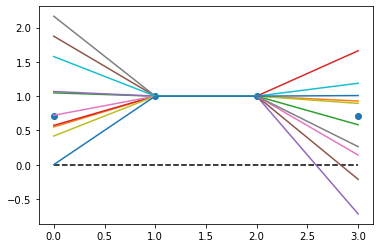

In [5]:
print("We can add multiple conditions!")

def add_conditions(mean, cov, pos_value_dict):
    pos_value_dict = deepcopy(pos_value_dict)
    if(len(pos_value_dict) == 1):
        for pos, value in pos_value_dict.items():
            return(add_condition(mean, cov, pos, value))
    else:
        pos = max(k for k, v in pos_value_dict.items())
        value = pos_value_dict[pos]
        mean, cov = add_condition(mean, cov, pos, value)
        del pos_value_dict[pos]
        return(add_conditions(mean, cov, pos_value_dict))

mean = np.array([0,0,0,0])
cov = np.array(
    [
     [1, .7, .5, .3],
     [.7, 1, .7, .5],
     [.5, .7, 1, .7],
     [.3, .5, .7, 1]
     ])

pos_value_dict = {
    2 : 1,
    1 : 1
}
print("\nWhat if {}?".format(pos_value_dict))

mean, cov = add_conditions(mean, cov, pos_value_dict)
output = multivariate_normal(mean, cov, output_shape)
print("\nMean after:\n{}.\n\nCov after:\n{}.\n\nOutput:\n{}.".format(mean, cov, output))

mean, output = fix_multiple(mean, output, pos_value_dict)
show(mean, output)

Mean:
[0 0 0 0 0 0 0 0 0 0].

Covariance:
[[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2]
 [0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3]
 [0.7 0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4]
 [0.6 0.7 0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5]
 [0.5 0.6 0.7 0.8 0.9 1.  0.9 0.8 0.7 0.6]
 [0.4 0.5 0.6 0.7 0.8 0.9 1.  0.9 0.8 0.7]
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.9 0.8]
 [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.9]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]].

Outputs:
[[-0.10195361  0.57714389 -0.23008925 -0.27448296  0.13010235  0.78723077
   0.09425043  0.61302271  0.68920631  0.85461069]
 [ 1.27999597  1.65769826  2.07894734  2.26638523  2.05192409  1.67685422
   1.49793422  0.88278974  1.02441506  0.39488067]
 [ 1.27591495  1.4225651   0.42569721  0.98333452  1.0667269   0.53585087
   0.03841127 -0.4529975  -0.15712786 -0.08679232]
 [ 0.32175279 -0.03389297 -0.02315666  0.58495107  0.5863833   0.13498901
   0.69785192  1.03125756  1.46737228  1.59598576]
 [ 0.09494185  0

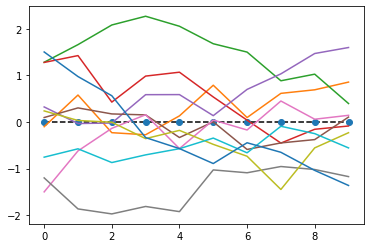

In [6]:
mean = np.array([0] * 10)
cov = np.array(
    [
        [1, .9, .8, .7, .6, .5, .4, .3, .2, .1],
        [.9, 1, .9, .8, .7, .6, .5, .4, .3, .2],
        [.8, .9, 1, .9, .8, .7, .6, .5, .4, .3],
        [.7, .8, .9, 1, .9, .8, .7, .6, .5, .4],
        [.6, .7, .8, .9, 1, .9, .8, .7, .6, .5],
        [.5, .6, .7, .8, .9, 1, .9, .8, .7, .6],
        [.4, .5, .6, .7, .8, .9, 1, .9, .8, .7],
        [.3, .4, .5, .6, .7, .8, .9, 1, .9, .8],
        [.2, .3, .4, .5, .6, .7, .8, .9, 1, .9],
        [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],

     ])
output = multivariate_normal(mean, cov, output_shape)
print("Mean:\n{}.\n\nCovariance:\n{}.\n\nOutputs:\n{}.".format(mean, cov, output))
show(mean, output)


What if {1: 1, 8: -1}?

Mean after:
[ 1.          0.71428571  0.42857143  0.14285714 -0.14285714 -0.42857143
 -0.71428571 -1.        ].

Cov after:
[[ 1.84615385e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.77555756e-17 -1.53846154e-02]
 [ 0.00000000e+00  1.71428571e-01  1.42857143e-01  1.14285714e-01
   8.57142857e-02  5.71428571e-02  2.85714286e-02 -4.85722573e-17]
 [ 0.00000000e+00  1.42857143e-01  2.85714286e-01  2.28571429e-01
   1.71428571e-01  1.14285714e-01  5.71428571e-02  6.93889390e-18]
 [-5.55111512e-17  1.14285714e-01  2.28571429e-01  3.42857143e-01
   2.57142857e-01  1.71428571e-01  8.57142857e-02 -3.46944695e-17]
 [ 0.00000000e+00  8.57142857e-02  1.71428571e-01  2.57142857e-01
   3.42857143e-01  2.28571429e-01  1.14285714e-01 -2.42861287e-17]
 [-2.77555756e-17  5.71428571e-02  1.14285714e-01  1.71428571e-01
   2.28571429e-01  2.85714286e-01  1.42857143e-01 -1.28369537e-16]
 [-4.16333634e-17  2.85714286e-02  5.71428571e-02  8.

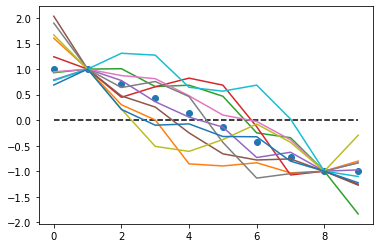

In [7]:
mean = np.array([0] * 10)
cov = np.array(
    [
        [1, .9, .8, .7, .6, .5, .4, .3, .2, .1],
        [.9, 1, .9, .8, .7, .6, .5, .4, .3, .2],
        [.8, .9, 1, .9, .8, .7, .6, .5, .4, .3],
        [.7, .8, .9, 1, .9, .8, .7, .6, .5, .4],
        [.6, .7, .8, .9, 1, .9, .8, .7, .6, .5],
        [.5, .6, .7, .8, .9, 1, .9, .8, .7, .6],
        [.4, .5, .6, .7, .8, .9, 1, .9, .8, .7],
        [.3, .4, .5, .6, .7, .8, .9, 1, .9, .8],
        [.2, .3, .4, .5, .6, .7, .8, .9, 1, .9],
        [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],

     ])
pos_value_dict = {
    1 : 1,
    8 : -1,
}
print("\nWhat if {}?".format(pos_value_dict))

mean, cov = add_conditions(mean, cov, pos_value_dict)
output = multivariate_normal(mean, cov, output_shape)
print("\nMean after:\n{}.\n\nCov after:\n{}.\n\nOutput:\n{}.".format(mean, cov, output))

mean, output = fix_multiple(mean, output, pos_value_dict)
show(mean, output)